In [1]:
#load librairies
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

For a definition of parameters, see main text.

# Occupation of both loxP sites
We assume that binding of LiCre at one loxP is independent from binding events at the other loxP site.

In [2]:
# fonction from Eliane to compute steady-state 
def proba_depending_on_concentration(K1, K2, N, C):
    """
    Function which plot the probability to be in each state at a concentration c
    P0: both loxP sites are empty
    P1: one Cre on only one loxP site, the other loxP site is empty
    P2m: two Cres on only one loxP site, the other loxP site is empty
    P2d: one Cre on each loxP site
    P3: one Cre on one loxP site and two Cre on the other
    P4: two Cre on each loxP site
    
    K1_Cre : 1/Kd1=Ratio of k1 and k_{-1} using the values of Cre
    K2_Cre : 1/Kd2=Ratio of k2 and k_{-2} using the values of Cre
    N : Number of points taken to discretize the concentration
    C : Concentration max taken
    
    """
    c = np.linspace(0.001, C, N)
    P0_s = lambda Cre : 1/(K1*K2*Cre**2 + 2*K1*Cre + 1)
    P1_s = lambda Cre : 2*K1*Cre/(K1*K2*Cre**2 + 2*K1*Cre + 1)
    P2_s = lambda Cre : K1*K2*Cre**2/(K1*K2*Cre**2 + 2*K1*Cre + 1)
    
    P0 = lambda Cre : P0_s(Cre)**2
    P1 = lambda Cre : 2*P0_s(Cre)*P1_s(Cre)
    P2m = lambda Cre : 2*P0_s(Cre)*P2_s(Cre)
    P2d = lambda Cre : P1_s(Cre)**2
    P3 = lambda Cre : 2*P1_s(Cre)*P2_s(Cre)
    P4 = lambda Cre : P2_s(Cre)**2
    
    
    #plt.figure(figsize=(10,5))
    plt.plot(c, P0(c), label = "P0")
    plt.plot(c, P1(c), label = "P1")
    plt.plot(c, P2m(c), label = "P2m")
    plt.plot(c, P2d(c), label = "P2d")
    plt.plot(c, P3(c), label = "P3")
    plt.plot(c, P4(c), label = "P4")
    
    plt.plot(c, P0(c) + P1(c) + P2m(c) + P2d(c) + P3(c) + P4(c), label = "Sum")
    axes = plt.gca()
    axes.set_xlabel('Concentration',fontsize=20)
    axes.set_ylabel('P',fontsize=20)

    plt.legend(loc ="center right",fontsize=10)
    plt.show()

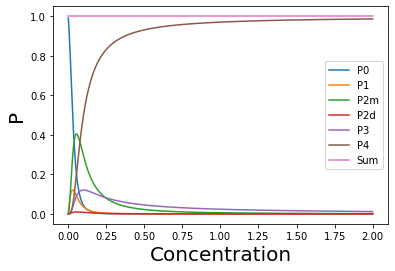

In [3]:
# plot the evolution of the occupancy probabilities as a function of Cre concentration
K1=1/0.49 #value taken from biacore estimation
K2=1/6.1e-3 #value taken from biacore estimation
Number_of_points = 1000
Concentration_max = 2 #in nM
proba_depending_on_concentration(K1, K2, Number_of_points, Concentration_max)

In [4]:
#function to specificically compute the probability to have two Cre on each loxP site
def P4(K1,K2,Cre):
    """
    
    K1 : 1/Kd1=Ratio of k1 and k_{-1} using the values of Cre
    K2 : 1/Kd2=Ratio of k2 and k_{-2} using the values of Cre
    Cre : LiCre Concentration 
    
    """
    
    P2_s = K1*K2*Cre**2/(K1*K2*Cre**2 + 2*K1*Cre + 1)
    return P2_s**2

# photo-activation of LiCre
We assume that the activation of one LiCre unit is independent from the state of the bound-LiCre units.

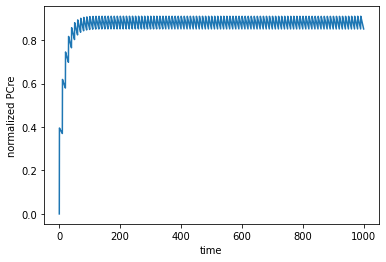

In [5]:
#Plot the probability Pact for a LiCre to be in the ON state, normalized by the maximum probability (kon/(kon+koff)) vs time
T=10. #period 
t=np.linspace(0,1000,10000)
duty=0.05 #duty cycle
ko=1 # on rate
kf=0.007 #off rate
sk=ko+kf;
tm=T*(ko*duty+kf)
n=np.floor(t/T)
plt.plot(t,np.heaviside(duty-(t/T-n),0)*((1-np.exp(-sk*(t-n*T)))+(1-np.exp(-sk*duty*T))*np.exp(-kf*(1-duty)*T)*(1-np.exp(-n*tm))/(1-np.exp(-tm))*np.exp(-sk*(t-n*T)))+np.heaviside((t/T-n)-duty,0)*(1-np.exp(-sk*duty*T))*(1-np.exp(-(n+1)*tm))/(1-np.exp(-tm))*np.exp(-kf*(t-n*T-duty*T)))

axes = plt.gca()
axes.set_xlabel('time')
axes.set_ylabel('normalized PCre')
plt.show()

In [6]:
# function to compute the probability Pact for a LiCre to be in the ON state Pact
def pcre(t,ko,kf,T,duty):
    """
    t : time
    ko : kon
    kf : koff
    T : period of illumination
    duty : duty cycle of illumination
    
    """
    sk=ko+kf;
    tm=T*(ko*duty+kf)
    n=np.floor(t/T)
    return (ko/(ko+kf))*(np.heaviside(duty-(t/T-n),0)*((1-np.exp(-sk*(t-n*T)))+(1-np.exp(-sk*duty*T))*np.exp(-kf*(1-duty)*T)*(1-np.exp(-n*tm))/(1-np.exp(-tm))*np.exp(-sk*(t-n*T)))+np.heaviside((t/T-n)-duty,0)*(1-np.exp(-sk*duty*T))*(1-np.exp(-(n+1)*tm))/(1-np.exp(-tm))*np.exp(-kf*(t-n*T-duty*T)))

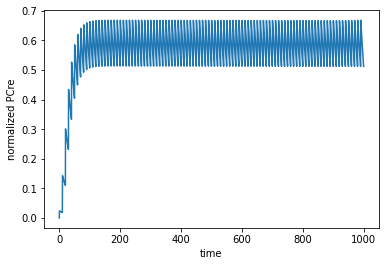

In [7]:
#Plot the probability that at least x among 4 LiCre units are currently in the activated state vs time
T=10. #period
t=np.linspace(0,1000,10000)
duty=0.05 #duty cycle
ko=1 # on rate
kf=0.007 #off rate
sk=ko+kf;
tm=T*(ko*duty+kf)
n=np.floor(t/T)
plt.plot(t,pcre(t,ko,kf,T,duty)**4)

#plt.plot(t,(1-(1-pcre(t,ko,kf,T,duty))**4)) #at least one
#plt.plot(t,((pcre(t,ko,kf,T,duty))**4+4*(pcre(t,ko,kf,T,duty))**3*(1-pcre(t,ko,kf,T,duty))+6*(pcre(t,ko,kf,T,duty))**2*(1-pcre(t,ko,kf,T,duty))**2)) #at least 2
#plt.plot(t,((pcre(t,ko,kf,T,duty))**4+4*(pcre(t,ko,kf,T,duty))**3*(1-pcre(t,ko,kf,T,duty)))) #at least 3
#plt.plot(t,(pcre(t,ko,kf,T,duty))**4) # at least 4

axes = plt.gca()
axes.set_xlabel('time')
axes.set_ylabel('normalized PCre')
plt.show()

# Recombination reaction
$R(t)=R_0 P_{2,2} A_x(t)$ with $P_{2,2}$ the probability that the 4 LiCre are on the loxP sites, $A_x(t)$ proba that at least $x$ LiCre are activated. If we note $p$ the proba for a cell to be still not excised at a time t: $dp(t)/dt = -R(t) p(t)$.
Solution: $p(t)=\exp[-\int_{0}^t dt' R(t')]$.

In [8]:
#reaction rate 
def R(t,R0,K1,K2,LiCre,ko,kf,duty,T):
    """
    t : time
    R0 : maximal reaction rate
    K1 : 1/Kd1=Ratio of k1 and k_{-1} using the values of Cre
    K2 : 1/Kd2=Ratio of k2 and k_{-2} using the values of Cre
    LiCre : LiCre Concentration
    ko : kon
    kf : koff
    T : period of illumination
    duty : duty cycle of illumination
    
    """
    return R0*P4(K1,K2,LiCre)*(pcre(t,ko,kf,T,duty))**4
#(1-(1-pcre(t,ko,kf,T,duty))**4) #at least one
#((pcre(t,ko,kf,T,duty))**4+4*(pcre(t,ko,kf,T,duty))**3*(1-pcre(t,ko,kf,T,duty))+6*(pcre(t,ko,kf,T,duty))**2*(1-pcre(t,ko,kf,T,duty))**2) #at least 2
#((pcre(t,ko,kf,T,duty))**4+4*(pcre(t,ko,kf,T,duty))**3*(1-pcre(t,ko,kf,T,duty))) #at least 3
#(pcre(t,ko,kf,T,duty))**4 # at least 4

In [9]:
# compute the probability for not having recombined
def p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T):
    """
    tmax : maximal time to compute p
    dt : time step
    R0 : maximal reaction rate
    K1 : 1/Kd1=Ratio of k1 and k_{-1} using the values of Cre
    K2 : 1/Kd2=Ratio of k2 and k_{-2} using the values of Cre
    LiCre : LiCre Concentration
    ko : kon
    kf : koff
    T : period of illumination
    duty : duty cycle of illumination
    
    """
    t=np.arange(0,tmax,dt)
    rt=R(t,R0,K1,K2,LiCre,ko,kf,duty,T)
    return np.exp(-np.cumsum(rt)*dt)

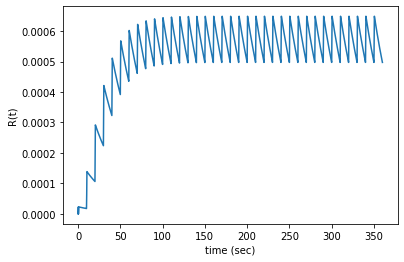

In [10]:
# plot the reaction rate as a function of time
tmax=360
dt=0.001
R0=1/1000 #in sec^-1
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
LiCre=1 #in nM
T=10. #period in sec
duty=0.5/10 #duty cycle
ko=1 # on rate in sec^-1
kf=0.007 #off rate in sec^-1
t=np.arange(0,tmax,dt)
plt.plot(t,R(t,R0,K1,K2,LiCre,ko,kf,duty,T))
axes = plt.gca()
axes.set_xlabel('time (sec)')
axes.set_ylabel('R(t)')
plt.show()

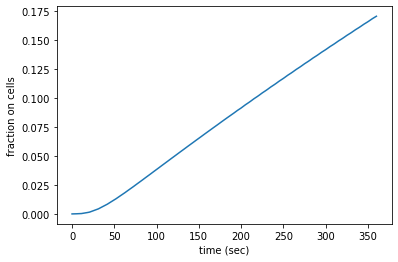

In [11]:
#plot the fraction of ON cell as a function of time
plt.plot(np.arange(0,tmax,dt),1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T))
axes = plt.gca()
axes.set_xlabel('time (sec)')
axes.set_ylabel('fraction on cells')
plt.show()

## fit $R_0$ and $k_{off}$
For a given $x$ value, for each set of data, we varied systematically $R_0$ and $k_{off}$ and compute a $\chi^2$-like score. To change $x$, modify the function R accordingly.

In [12]:
f=0.87 #normalization factor of multiplication of experimental data

### dataset 8

In [13]:
#load dataset
timel=np.array([10,20,30,60,90,180,240]) #time
frm=np.array([0.0949,0.1794,0.2713,0.4756,0.6318,0.8317,0.8555]) #average
frs=np.array([0.0136,0.0179,0.0204,0.0307,0.0261,0.0242,0.0199]) #sterror

In [14]:
#compute the chi2 for several R0 and koff
tmax=60*240 #in sec
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
ko=1 # on rate in sec^-1
T=10. #period
duty=0.5/10 #duty cycle
LiCre=1 #in nM
tm0=time.time()

chi2a=np.zeros((31,31))
fi=np.zeros(int(tmax/dt))
    
for ir in range(31):
    R0=10**(-4.3+0.05*ir)
        
    for ik in range(31):
        kf=0.005*10**(-0.8+0.05*ik) #off rate in sec^-1
            
        fi=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T)
            
        chi2a[ir,ik]=np.nansum((fi[(timel*60/dt-1).astype(int)]-frm/f)**2)
print(time.time()-tm0)

74.92354917526245


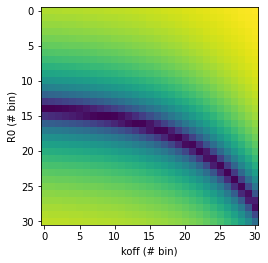

(14, 0) 0.023692678519401655


In [15]:
#plot the matrix of chi2-score
a=chi2a
plt.imshow(np.log10(a))
axes = plt.gca()
axes.set_xlabel('koff (# bin)')
axes.set_ylabel('R0 (# bin)')
plt.show()

ind=np.unravel_index(np.argmin(a, axis=None), a.shape) #minimum value
print(ind,np.sqrt(a[ind]/7))

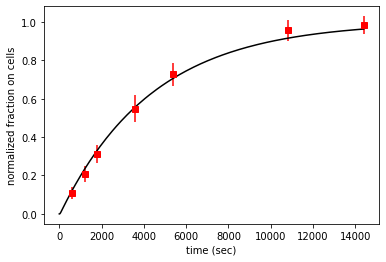

In [16]:
#plot the dataset and the model prediction for fixed R0 adn koff value
tmax=60*240
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
T=10. #period
duty=0.5/10 #duty cycle
ko=1 # on rate in sec^-1

LiCre=1 #in nM
R0=10**(-4.3+0.05*14) #in sec^-1
kf=0.005*10**(-0.8+0.05*0) #off rate in sec^-1


fi=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T)

axes = plt.gca()
axes.set_xlabel('time (sec)')
axes.set_ylabel('normalized fraction on cells')
plt.errorbar(timel*60,frm/f,yerr=2*frs/f,fmt='sr')
plt.plot(np.arange(0,tmax,dt),fi,'k')
plt.show()

### datasets 1 & 2

In [17]:
#load datasets
dt10=np.array([5,10,50,100])/100
frm10=np.array([0.2606,0.3091,0.2924,0.2475])
frs10=np.array([0.0322,0.0585,0.0405,0.0493])
dt120=np.array([1,5,10,50])/100
frm120=np.array([0.0412,0.0772,0.1082,0.2414])
frs120=np.array([0.0102,0.0172,0.0190,0.0231])
dt120l=np.array([5,10,50,75,100])/100
frm120l=np.array([0.0164,0.0223,0.1451,0.1545,0.2273])
frs120l=np.array([0.0037,0.0020,0.0140,0.0249,0.0293])

In [18]:
tmax=3600
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
LiCre=1
tm0=time.time()

chi2b=np.zeros((31,31))
f10=np.zeros(4)
f120=np.zeros(4)
f120l=np.zeros(5)

    
for ir in range(31):
    R0=10**(-4.3+0.05*ir)
        
    for ik in range(31):
        kf=0.005*10**(-0.8+0.05*ik) #off rate in sec^-1

        ko=1 # on rate in sec^-1
        T=10. #period
        for i in range(4):
            f10[i]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,dt10[i],T)[-1]
        T=120
        for i in range(4):
            f120[i]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,dt120[i],T)[-1]
        ko=1/35*1.5 # on rate in sec^-1
        T=120
        for i in range(5):
            f120l[i]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,dt120l[i],T)[-1]

        chi2b[ir,ik]=np.sum(((f10-frm10/f))**2)+np.sum(((f120-frm120/f))**2)+np.sum(((f120l-frm120l/f))**2)
print(time.time()-tm0)            

244.31450176239014


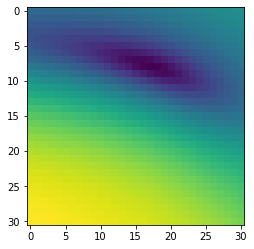

(8, 17) 0.03818576228257515


In [19]:
#plot the chi2 matrix
a=chi2b
plt.imshow(np.log10(a))
axes = plt.gca()
axes.set_xlabel('koff (# bin)')
axes.set_ylabel('R0 (# bin)')
plt.show()

ind=np.unravel_index(np.argmin(a, axis=None), a.shape)
print(ind,np.sqrt(a[ind]/13))

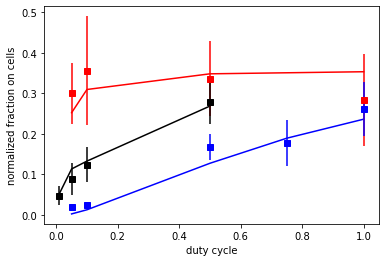

In [92]:
tmax=3600
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore

LiCre=1 #in nM
R0=10**(-4.3+0.05*8) #in sec^-1
kf=0.005*10**(-0.8+0.05*17) #off rate in sec^-1

ko=1 # on rate in sec^-1

T=10. #period
f10=np.zeros(4)
for i in range(4):
    f10[i]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,dt10[i],T)[-1]

T=120
f120=np.zeros(4)
for i in range(4):
    f120[i]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,dt120[i],T)[-1]
    
ko=1/35*1.5 # on rate in sec^-1
f120l=np.zeros(5)
for i in range(5):
    f120l[i]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,dt120l[i],T)[-1]

plt.plot(dt10,f10,'r')
plt.plot(dt120,f120,'k')
plt.plot(dt120l,f120l,'b')
plt.errorbar(dt10,frm10/f,yerr=2*frs10/f,fmt='sr')
plt.errorbar(dt120,frm120/f,yerr=2*frs120/f,fmt='sk')
plt.errorbar(dt120l,frm120l/f,yerr=2*frs120l/f,fmt='sb')
axes = plt.gca()
axes.set_xlabel('duty cycle')
axes.set_ylabel('normalized fraction on cells')
plt.show()

### dataset 9

In [20]:
#load dataset
intens=np.array([3,9,28,85,255])/255
frm=np.array([0.0027,0.0271,0.1350,0.3540,0.2945])
frs=np.array([0.0012,0.0050,0.0118,0.0185,0.0428])

In [21]:
tmax=3600
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
ko=1 # on rate in sec^-1
duty=2./7.
T=7.
LiCre=1

tm0=time.time()

chi2c=np.zeros((31,31))
fi=np.zeros(5)

for ir in range(31):
    R0=10**(-4.3+0.05*ir)
        
    for ik in range(31):
        kf=0.005*10**(-0.8+0.05*ik) #off rate in sec^-1

        for i in range(5):
            fi[i]=1-p(tmax,dt,R0,K1,K2,LiCre,ko*intens[i],kf,duty,T)[-1]

        chi2c[ir,ik]=np.sum(((fi-frm/f))**2)
print(time.time()-tm0)            

90.93861508369446


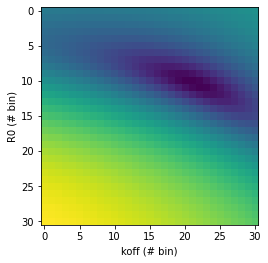

(10, 21) 0.045850562320319664


In [22]:
#plot the chi2 matrix
a=chi2c
plt.imshow(np.log10(a))
axes = plt.gca()
axes.set_xlabel('koff (# bin)')
axes.set_ylabel('R0 (# bin)')
plt.show()

ind=np.unravel_index(np.argmin(a, axis=None), a.shape)
print(ind,np.sqrt(a[ind]/5))

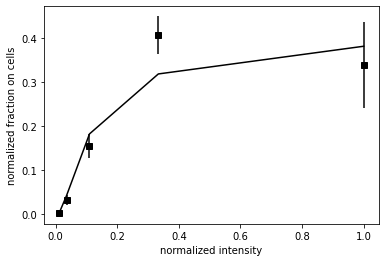

In [23]:
tmax=3600
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
ko=1 # on rate in sec^-1
duty=2./7.
T=7.

LiCre=1 #in nM
R0=10**(-4.3+0.05*10) #in sec^-1
kf=0.005*10**(-0.8+0.05*21) #off rate in sec^-1


fi=np.zeros(5)
for i in range(5):
    fi[i]=1-p(tmax,dt,R0,K1,K2,LiCre,ko*intens[i],kf,duty,T)[-1]

plt.plot(intens,fi,'k')
plt.errorbar(intens,frm/f,yerr=2*frs/f,fmt='sk')
axes = plt.gca()
axes.set_xlabel('normalized intensity')
axes.set_ylabel('normalized fraction on cells')
plt.show()

### datasets 3,4,5,& 6

In [24]:
#load datasets
Tl=np.array([5,10,20,60]) #period in sec
timel=np.array([7,20,60,180]) #time in min
frm=np.array([[0.0673,0.1812,0.4621,np.nan],
    [0.0611,0.1290,0.4311,0.7164],
       [np.nan,0.1557,0.3962,np.nan],
    [0.0240,0.0607,0.2199,np.nan],
    [0.0463,0.1093,0.3286,np.nan]])
frs=np.array([[0.0049,0.0193,0.0276,np.nan],
    [0.0047,0.0144,0.0135,0.0151],
       [np.nan,0.0158,0.0103,np.nan],
    [0.0036,0.0032,0.0078,np.nan],
             [0.0086,0.0028,0.0169,np.nan]])

In [25]:
tmax=60*180
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
ko=1 # on rate in sec^-1
LiCre=1
tm0=time.time()

chi2d=np.zeros((31,31))

fi=np.zeros((5,int(tmax/dt)))
    
for ir in range(31):
    R0=10**(-4.3+0.05*ir)
        
    for ik in range(31):
        kf=0.005*10**(-0.8+0.05*ik) #off rate in sec^-1
            
        duty=0.1
        for i in range(4):
            fi[i,:]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,Tl[i])
        duty=0.3333
        T=60
        fi[4,:]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T)
        for i in range(5):
            chi2d[ir,ik]=chi2d[ir,ik]+np.nansum((fi[i,(timel*60/dt-1).astype(int)]-frm[i,:]/f)**2)
print(time.time()-tm0)

280.45895504951477


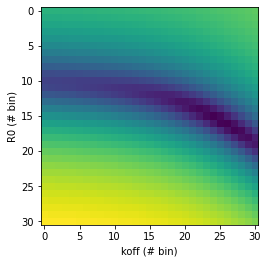

(16, 26) 0.03672711280930137


In [26]:
#plot the chi2 matrix
a=chi2d
plt.imshow(np.log10(a))
axes = plt.gca()
axes.set_xlabel('koff (# bin)')
axes.set_ylabel('R0 (# bin)')
plt.show()

ind=np.unravel_index(np.argmin(a, axis=None), a.shape)
print(ind,np.sqrt(a[ind]/15))

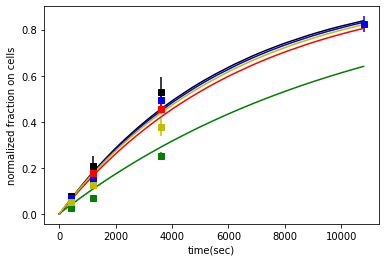

In [27]:
tmax=180*60
dt=0.01
K1=1/0.49 #value biacore
K2=1/6.1e-3 #value biacore
ko=1 # on rate in sec^-1

LiCre=1 #in nM
R0=10**(-4.3+0.05*16) #in sec^-1
kf=0.005*10**(-0.3+0.05*16) #off rate in sec^-1

duty=0.1


color=['k','b','r','g']

fi=np.zeros((5,int(tmax/dt)))
for i in range(4):
    fi[i,:]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,Tl[i])
    plt.plot(np.arange(0,tmax,dt),fi[i,:],color[i])
    plt.errorbar(timel*60,frm[i]/f,yerr=2*frs[i]/f,fmt='s'+color[i])
    
duty=0.33333
T=60
fi[4,:]=1-p(tmax,dt,R0,K1,K2,LiCre,ko,kf,duty,T)
plt.plot(np.arange(0,tmax,dt),fi[4,:],'y')
plt.errorbar(timel*60,frm[4]/f,yerr=2*frs[4]/f,fmt='sy')    
axes = plt.gca()
axes.set_xlabel('time(sec)')
axes.set_ylabel('normalized fraction on cells')
plt.show()

### from all the chi2 matrices, inferring the best $k_{off}$
For each experiment and each $k_{off}$ value, we estimate the $R_0$ value that minimizes the score. For a given $k_{off}$, the total score is given by the sum of all this experiment-specific min score.

In [28]:
chimin=np.zeros(31)
R0min=np.zeros((4,31))
for i in range(31):
    R0min[0,i]=np.argmin(chi2a[:,i])
    R0min[1,i]=np.argmin(chi2b[:,i])
    R0min[2,i]=np.argmin(chi2c[:,i])
    R0min[3,i]=np.argmin(chi2d[:,i])
    chimin[i]=chimin[i]+np.min(chi2a[:,i])+np.min(chi2b[:,i])+np.min(chi2c[:,i])+np.min(chi2d[:,i])

In [29]:
#optimal koff
print(0.005*10**(-0.8+0.05*np.argmin(chimin)))

0.007062687723113772


In [30]:
#corresponding R0 values
print(10**(-4.3+0.05*R0min[:,np.argmin(chimin)]))

[0.00039811 0.00014125 0.00015849 0.00022387]


In [31]:
#total minimum chi2-score
print(np.sqrt(np.min(chimin)/40))

0.040650209106793345
